# **Zomato Restaurant Data Analysis**

-------------------------------------------------


Objective: Explore the restaurant dataset to identify food trends, ratings, and delivery
preferences by location.

# Load the dataset

-------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/BangaloreZomatoData.csv')
df

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indira...",+919945977774,1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...","Economical, Prompt Service, Hygiene, Quality F...",450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar M...",+918041135050,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...","Boneless Chicken Biryani, Ample Seating Area, ...",700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),"8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Ba...",+918861564169,1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambia...",300
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),"308, 2nd Stage, 100 Feet Road, Indiranagar, Ba...",+919916465787,1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White...","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),"38/1A, CMH Road, Indiranagar, Bangalore",+919513700040,1,1,1,0,2.8,673,4.0,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, Vi...",400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,New SBFC Food Funda,https://www.zomato.com/bangalore/new-sbfc-food...,Fast Food,"Frazer Town, Bangalore",4:30pm – 11:45pm (Today),"667/1, 9th Cross, Periyan Nagar, Devara Jeevan...",+916291201792,1,1,1,0,3.7,14,4.0,48,NaN,NaN,"Cheap and Affordable, Served Quickly, Fresh Fo...",300
8919,Kudla - Coraltree,https://www.zomato.com/bangalore/kudla-coraltr...,"Seafood, Mangalorean, Beverages","Coraltree, RT Nagar, Bangalore",12noon – 10pm (Today),"Coraltree, 16, MLA Layout, RT Nagar Main Road,...",+917760978681,1,1,0,0,3.9,348,4.3,564,NaN,"Neer Dosa, Chicken Ghee Roast, Seafood, Crab, ...","Authentic, Cashless Payments, Preparation, Dec...",1200
8920,Bangkok Bowl,https://www.zomato.com/bangalore/bangkok-bowl-...,"Salad, Chinese","Kammanahalli, Bangalore","12noon – 3pm, 6:30pm – 10pm (Today)","403, 3A Cross, Mariayappa Road, Kammanahalli, ...",+919739999170,1,1,0,0,-,0,3.7,254,NaN,NaN,"Contactless Delivery, Portion, Great Portions,...",300
8921,Yuan Restaurant,https://www.zomato.com/bangalore/yuan-restaura...,"Thai, Chinese","HBR Layout, Bangalore",Opens at 7pm,"2&3, Renu Arcade, 1st Stage, 2nd Block, 80 Fee...",+919901047070,1,1,1,0,3.8,188,3.5,3169,NaN,NaN,"Calm, Prompt Service, Portions, Spicy, Delicio...",400


-------------------------------------------------


In [2]:
df.shape

(8923, 19)

-------------------------------------------------


In [3]:
df.columns

Index(['Name', 'URL', 'Cuisines', 'Area', 'Timing', 'Full_Address',
       'PhoneNumber', 'IsHomeDelivery', 'isTakeaway', 'isIndoorSeating',
       'isVegOnly', 'Dinner Ratings', 'Dinner Reviews', 'Delivery Ratings',
       'Delivery Reviews', 'KnownFor', 'PopularDishes', 'PeopleKnownFor',
       'AverageCost'],
      dtype='object')

# Drop unnecessary columns

-------------------------------------------------


In [4]:
columns_to_drop = [
    'URL', 'Full_Address', 'PhoneNumber',
    'KnownFor', 'PopularDishes', 'PeopleKnownFor'
]
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost
0,Sri Udupi Park,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),1,1,1,1,4.0,462,4.1,16000,450
1,Meghana Foods,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,1,1,1,0,4.3,1654,4.3,28600,700
2,Donne Biriyani House,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),1,1,1,0,3.9,411,3.5,33200,300
3,Domino's Pizza,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),1,1,1,0,2.4,422,4.4,8205,400
4,KFC,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),1,1,1,0,2.8,673,4.0,9148,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,New SBFC Food Funda,Fast Food,"Frazer Town, Bangalore",4:30pm – 11:45pm (Today),1,1,1,0,3.7,14,4.0,48,300
8919,Kudla - Coraltree,"Seafood, Mangalorean, Beverages","Coraltree, RT Nagar, Bangalore",12noon – 10pm (Today),1,1,0,0,3.9,348,4.3,564,1200
8920,Bangkok Bowl,"Salad, Chinese","Kammanahalli, Bangalore","12noon – 3pm, 6:30pm – 10pm (Today)",1,1,0,0,-,0,3.7,254,300
8921,Yuan Restaurant,"Thai, Chinese","HBR Layout, Bangalore",Opens at 7pm,1,1,1,0,3.8,188,3.5,3169,400


# Convert string-based number columns to proper numeric

-------------------------------------------------


In [5]:
numeric_columns = [
    'Dinner Ratings', 'Dinner Reviews',
    'Delivery Ratings', 'Delivery Reviews', 'AverageCost'
]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

,Name,Cuisines,Area,Timing,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost
0,Sri Udupi Park,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),1,1,1,1,4.0,462,4.1,16000,450
1,Meghana Foods,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,1,1,1,0,4.3,1654,4.3,28600,700
2,Donne Biriyani House,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),1,1,1,0,3.9,411,3.5,33200,300
3,Domino's Pizza,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),1,1,1,0,2.4,422,4.4,8205,400
4,KFC,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),1,1,1,0,2.8,673,4.0,9148,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,New SBFC Food Funda,Fast Food,"Frazer Town, Bangalore",4:30pm – 11:45pm (Today),1,1,1,0,3.7,14,4.0,48,300
8919,Kudla - Coraltree,"Seafood, Mangalorean, Beverages","Coraltree, RT Nagar, Bangalore",12noon – 10pm (Today),1,1,0,0,3.9,348,4.3,564,1200
8920,Bangkok Bowl,"Salad, Chinese","Kammanahalli, Bangalore","12noon – 3pm, 6:30pm – 10pm (Today)",1,1,0,0,NaN,0,3.7,254,300
8921,Yuan Restaurant,"Thai, Chinese","HBR Layout, Bangalore",Opens at 7pm,1,1,1,0,3.8,188,3.5,3169,400


## Drop rows with missing essential information



-------------------------------------------------


In [6]:
essential_columns = [
    'Dinner Ratings', 'Delivery Ratings',
    'AverageCost', 'Area', 'Cuisines'
]
df.dropna(subset=essential_columns, inplace=True)
print("Cleaned dataset shape:", df.shape)
print("\n Cleaned columns:", df.columns.tolist())
print("\n Sample data:\n", df.tail())

Cleaned dataset shape: (3497, 13)

 Cleaned columns: ['Name', 'Cuisines', 'Area', 'Timing', 'IsHomeDelivery', 'isTakeaway', 'isIndoorSeating', 'isVegOnly', 'Dinner Ratings', 'Dinner Reviews', 'Delivery Ratings', 'Delivery Reviews', 'AverageCost']

 Sample data:
                       Name                                           Cuisines  \
8915            Ocea Hotel  North Indian, Chinese, Seafood, Biryani, Bever...   
8916  Lassi & Snacks Joint  Beverages, Fast Food, Sandwich, Desserts, Burg...   
8918   New SBFC Food Funda                                          Fast Food   
8919     Kudla - Coraltree                    Seafood, Mangalorean, Beverages   
8921       Yuan Restaurant                                      Thai, Chinese   

                                Area                    Timing  \
8915         Brigade Road, Bangalore      12noon – 1am (Today)   
8916               Domlur, Bangalore    11:30am – 10pm (Today)   
8918          Frazer Town, Bangalore  4:30pm – 11:45

-------------------------------------------------


# Ratings & Review Analysis

-------------------------------------------------


In [7]:
sns.set_style("darkgrid")

# Distribution of Dinner Ratings


-------------------------------------------------


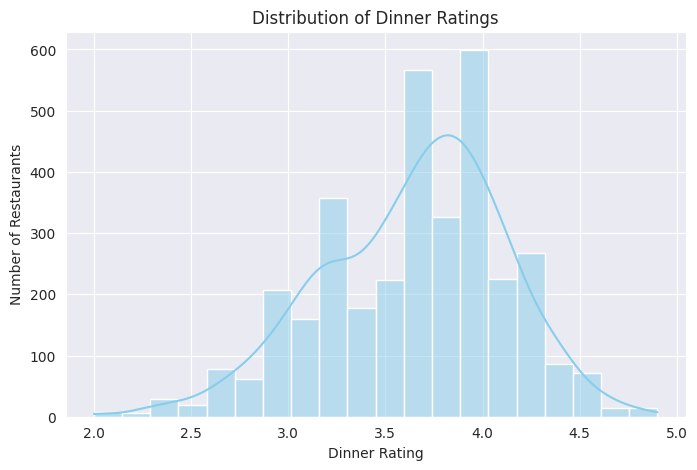

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Dinner Ratings'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Dinner Ratings")
plt.xlabel("Dinner Rating")
plt.ylabel("Number of Restaurants")
plt.show()

# Distribution of Delivery Ratings


-------------------------------------------------


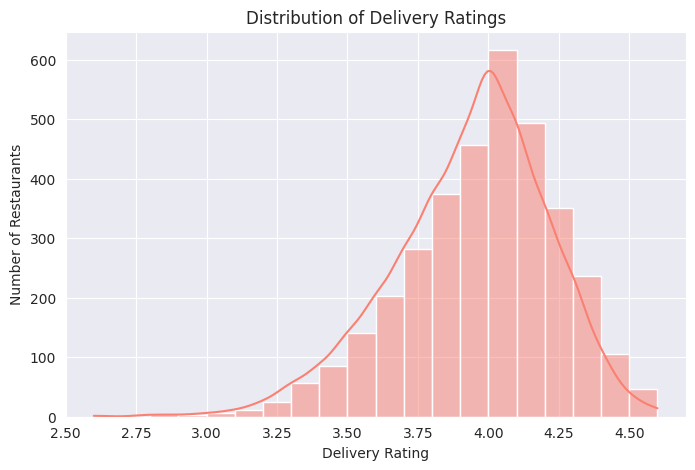

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Delivery Ratings'], bins=20, kde=True, color='salmon')
plt.title("Distribution of Delivery Ratings")
plt.xlabel("Delivery Rating")
plt.ylabel("Number of Restaurants")
plt.show()

# Scatter plot - Average Cost vs Dinner Ratings, hue = Veg/Non-Veg


-------------------------------------------------


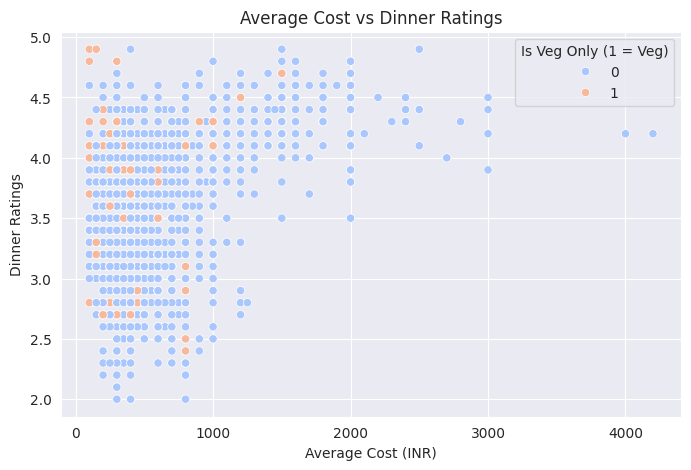

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='AverageCost',
    y='Dinner Ratings',
    data=df,
    hue='isVegOnly',
    palette='coolwarm'
)
plt.title("Average Cost vs Dinner Ratings")
plt.xlabel("Average Cost (INR)")
plt.ylabel("Dinner Ratings")
plt.legend(title='Is Veg Only (1 = Veg)')
plt.show()


# Dinner Ratings by Home Delivery Availability


-------------------------------------------------


/tmp/ipython-input-12-236433635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


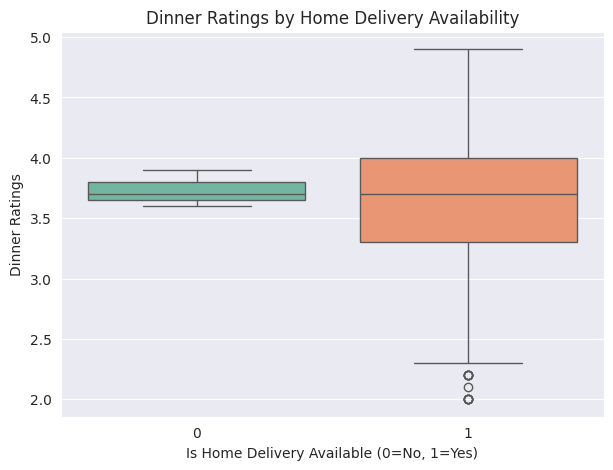

In [12]:
plt.figure(figsize=(7, 5))
sns.boxplot(
    x='IsHomeDelivery',
    y='Dinner Ratings',
    data=df,
    palette='Set2'
)
plt.title("Dinner Ratings by Home Delivery Availability")
plt.xlabel("Is Home Delivery Available (0=No, 1=Yes)")
plt.ylabel("Dinner Ratings")
plt.show()


# Top 20 Most Common Areas

-------------------------------------------------


/tmp/ipython-input-13-767881856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_areas.values, y=top_areas.index, palette='coolwarm')


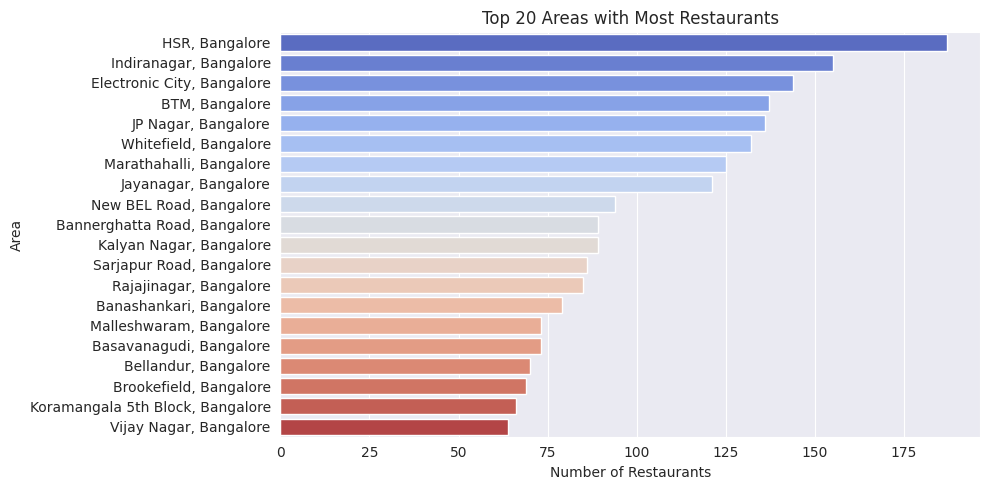

In [13]:
top_areas = df['Area'].value_counts().head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_areas.values, y=top_areas.index, palette='coolwarm')
plt.title("Top 20 Areas with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Area")
plt.tight_layout()
plt.show()


# Top 15 Primary Cuisines

-------------------------------------------------


/tmp/ipython-input-14-4232427119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='Set2')


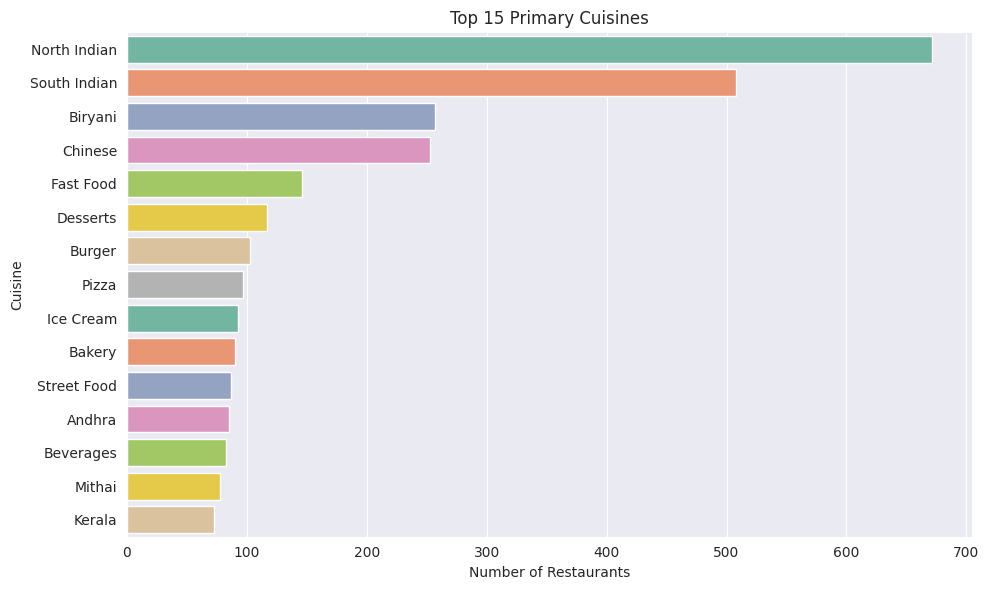

In [14]:
df['PrimaryCuisine'] = df['Cuisines'].astype(str).str.split(', ').str[0]
top_cuisines = df['PrimaryCuisine'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='Set2')
plt.title("Top 15 Primary Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

# Group Data (Top Areas vs High Rated Restaurants)

-------------------------------------------------


/tmp/ipython-input-15-756313297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_group.values, y=area_group.index, palette='crest')


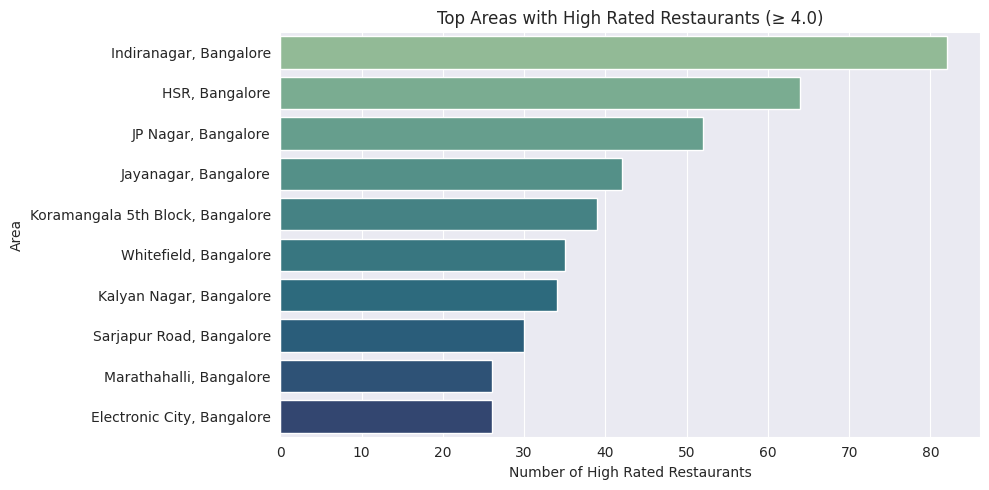

In [15]:
high_rated = df[df['Dinner Ratings'] >= 4.0]
area_group = high_rated['Area'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=area_group.values, y=area_group.index, palette='crest')
plt.title("Top Areas with High Rated Restaurants (≥ 4.0)")
plt.xlabel("Number of High Rated Restaurants")
plt.ylabel("Area")
plt.tight_layout()
plt.show()


# Average Cost by Rating Class

-------------------------------------------------


/tmp/ipython-input-18-616687629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='RatingClass', y='AverageCost', data=df, palette='Set1')


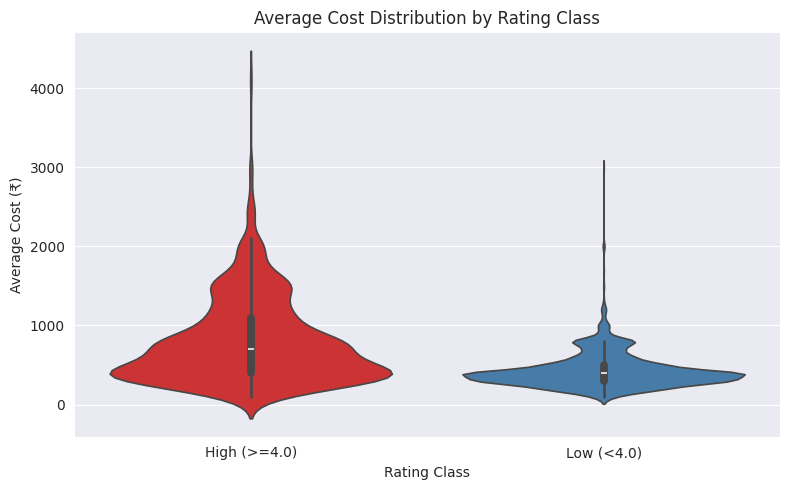

In [18]:
df['RatingClass'] = df['Dinner Ratings'].apply(
    lambda x: 'High (>=4.0)' if x >= 4.0 else 'Low (<4.0)'
)
plt.figure(figsize=(8, 5))
sns.violinplot(x='RatingClass', y='AverageCost', data=df, palette='Set1')
plt.title("Average Cost Distribution by Rating Class")
plt.xlabel("Rating Class")
plt.ylabel("Average Cost (₹)")
plt.tight_layout()
plt.show()


# Heatmap of Primary Cuisines vs. Top Areas

-------------------------------------------------


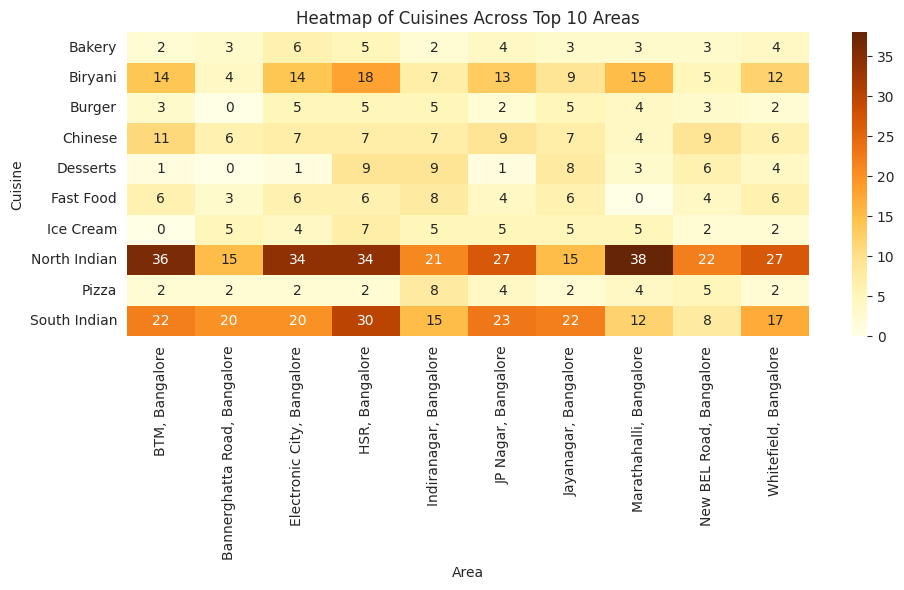

In [19]:
df['PrimaryCuisine'] = df['Cuisines'].astype(str).str.split(', ').str[0]
top_areas = df['Area'].value_counts().head(10).index
top_cuisines = df['PrimaryCuisine'].value_counts().head(10).index
filtered_df = df[df['Area'].isin(top_areas) & df['PrimaryCuisine'].isin(top_cuisines)]
pivot_table = filtered_df.pivot_table(index='PrimaryCuisine', columns='Area', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap='YlOrBr')
plt.title("Heatmap of Cuisines Across Top 10 Areas")
plt.xlabel("Area")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()


# Top 5 Areas and Top 5 Cuisines

-------------------------------------------------


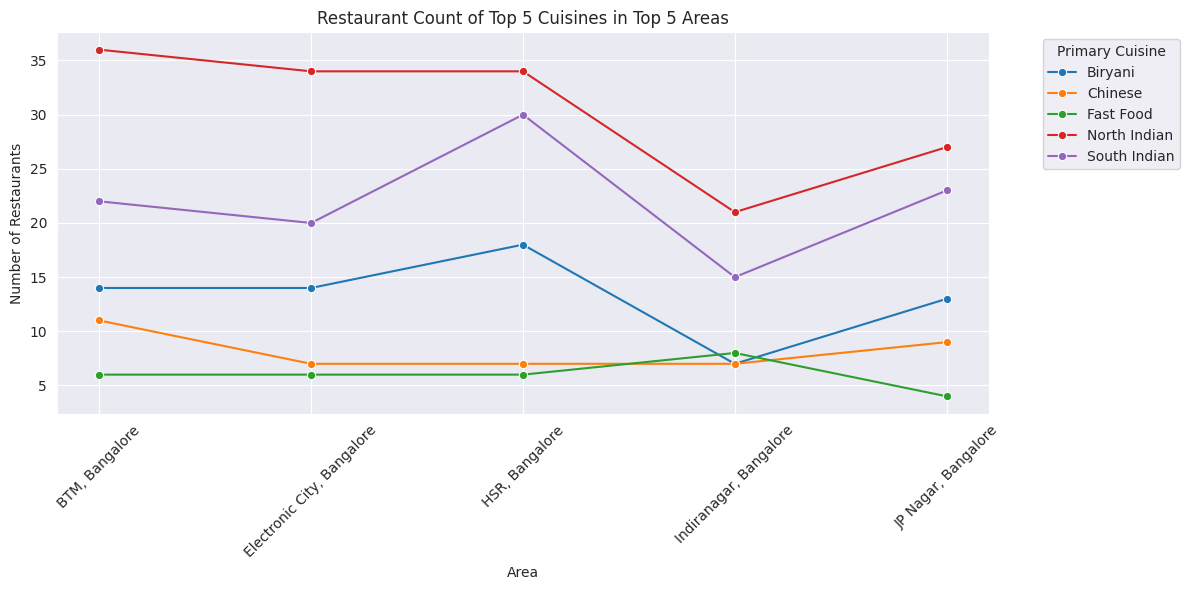

In [20]:
top_areas = df['Area'].value_counts().head(5).index
filtered_area = df[df['Area'].isin(top_areas)]
top_cuisines = df['PrimaryCuisine'].value_counts().head(5).index
filtered = filtered_area[filtered_area['PrimaryCuisine'].isin(top_cuisines)]
grouped = filtered.groupby(['Area', 'PrimaryCuisine']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Area', y='Count', hue='PrimaryCuisine', marker='o')
plt.title("Restaurant Count of Top 5 Cuisines in Top 5 Areas")
plt.xlabel("Area")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.legend(title='Primary Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
